In [1]:
#!/usr/bin/env python3 

In [25]:
# Importing the necessary packages 
import numpy as np 
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [26]:
# Reading in the dataset into memory
dataset = pd.read_csv('Bundesliga_Results.csv')

# viewing the dataset 
dataset.head() 

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


In [27]:
# Removing the columns with NaN values 
dataset = dataset.drop(['HTHG', 'HTAG', 'HTR'], axis=1)

# Viewing the cleaned dataset 
dataset.head() 

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,1993-94


In [28]:
# converting the date and season into date time formats 
# Changing the datetime for the Actual Date the mactches was played
time = pd.to_datetime(dataset['Date'], dayfirst=True, errors='coerce')
dataset['year'] = time.dt.year 
dataset['month'] = time.dt.month 
dataset['day'] = time.dt.day 
# Dropping the data column 
dataset = dataset.drop(['Date'], axis=1)

# Converting the Season data time formats 
# changing the datetime format for the actual seasons the match was played 
dataset['S_year1'] = dataset['Season'].str[0:4].astype('int')
dataset['S_year2'] = dataset['Season'].str[5:].astype('int')
# Dropping the data column 
dataset = dataset.drop(['Season'], axis=1)

In [29]:
# Creating a new dataframe from the existing loaded dataset. 
df = dataset[['S_year1', 'S_year2', 'year', 'month', 'day', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']]
df.head()

,S_year1,S_year2,year,month,day,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1993,94,1993,8,7,Bayern Munich,Freiburg,3,1,H
1,1993,94,1993,8,7,Dortmund,Karlsruhe,2,1,H
2,1993,94,1993,8,7,Duisburg,Leverkusen,2,2,D
3,1993,94,1993,8,7,FC Koln,Kaiserslautern,0,2,A
4,1993,94,1993,8,7,Hamburg,Nurnberg,5,2,H


In [30]:
# Displaying the number of division in the League  
dataset['Div'].unique() 

array(['D1'], dtype=object)

In [31]:
# Showing the unique values of all the clubs in total. 
df['HomeTeam'].unique()

array(['Bayern Munich', 'Dortmund', 'Duisburg', 'FC Koln', 'Hamburg',
       'Leipzig', "M'Gladbach", 'Wattenscheid', 'Werder Bremen',
       'Dresden', 'Ein Frankfurt', 'Freiburg', 'Kaiserslautern',
       'Karlsruhe', 'Leverkusen', 'Nurnberg', 'Schalke 04', 'Stuttgart',
       'Uerdingen', 'Bochum', 'Munich 1860', "M'gladbach",
       'Hansa Rostock', 'St Pauli', 'Dusseldorf', 'Bielefeld', 'Hertha',
       'Wolfsburg', 'Ulm', 'Unterhaching', 'Cottbus', 'Hannover', 'Mainz',
       'Aachen', 'Hoffenheim', 'Augsburg', 'Greuther Furth',
       'Fortuna Dusseldorf', 'Braunschweig', 'Paderborn', 'Darmstadt',
       'Ingolstadt', 'RB Leipzig'], dtype=object)

In [32]:
# Creating a dictionary to store the numerical values for the respective clubs 
C = {
    "Bayern Munich": 1, 
    "Dortmund": 2, 
    "Duisburg": 3, 
    "FC Koln": 4, 
    "Hamburg": 5, 
    "Leipzig": 6,
    "M'Gladbach": 7,
    "Wattenscheid": 8, 
    "Werder Bremen": 9, 
    "Dresden": 10, 
    "Ein Frankfurt": 11,            
    "Freiburg": 12, 
    "Kaiserslautern": 13, 
    "Karlsruhe": 14, 
    "Leverkusen": 15, 
    "Nurnberg": 16, 
    "Schalke 04": 17, 
    "Stuttgart": 18, 
    "Uerdingen": 19, 
    "Bochum": 20, 
    "Munich 1860": 21, 
    "M'gladbach": 22, 
    "Hansa Rostock": 23, 
    "St Pauli": 24, 
    "Dusseldorf": 25, 
    "Bielefeld": 26, 
    "Hertha": 27, 
    "Wolfsburg": 28, 
    "Ulm": 29, 
    "Unterhaching": 30, 
    "Cottbus": 31, 
    "Hannover": 32, 
    "Mainz": 33, 
    "Aachen": 34, 
    "Hoffenheim": 35, 
    "Augsburg": 36, 
    "Greuther Furth": 37, 
    "Fortuna Dusseldorf": 38, 
    "Braunschweig": 39, 
    "Paderborn": 40, 
    "Darmstadt": 41   
}

# mapping the values of the respective dictionary and its corresponding values 
# to the created cleaned dataframe 
df['HomeTeam'] = df['HomeTeam'].map(C)
df['AwayTeam'] = df['AwayTeam'].map(C)

/home/mbonu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mbonu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
# Showing the Values for the full time results 
# H = Home Team won = 1
# D = The match was a Draw = 3
# A = Away Team Won = 2 
df['FTR'].unique() 

array(['H', 'D', 'A'], dtype=object)

In [34]:
# Creating a dictionary to convert the values in the FTR column into numerical values 
FT = {}
FT['H'] = 1  # Home team won for values on one 
FT['A'] = 2  # Away team won for values of two 
FT['D'] = 3  # the match ended a Draw for values of three. 

# Mapping the values to the FTR column 
df['FTR'] = df['FTR'].map(FT)


/home/mbonu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
# Viewing the filtered dataset that has only numerical values. 
# Cleaning the dataset and removing Nan Values
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df.fillna(df.mean(), inplace=True)
df.head() 

,S_year1,S_year2,year,month,day,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1993,94,1993,8,7,1.0,12.0,3,1,1
1,1993,94,1993,8,7,2.0,14.0,2,1,1
2,1993,94,1993,8,7,3.0,15.0,2,2,3
3,1993,94,1993,8,7,4.0,13.0,0,2,2
4,1993,94,1993,8,7,5.0,16.0,5,2,1


In [36]:
## Visualizing the Graph 
df.dtypes

S_year1       int64
S_year2       int64
year          int64
month         int64
day           int64
HomeTeam    float64
AwayTeam    float64
FTHG          int64
FTAG          int64
FTR           int64
dtype: object

In [37]:
# Getting the count for the Draw 
dataset.loc[dataset['FTR'] == 'D'].count()

Div         1964
HomeTeam    1964
AwayTeam    1964
FTHG        1964
FTAG        1964
FTR         1964
year        1964
month       1964
day         1964
S_year1     1964
S_year2     1964
dtype: int64

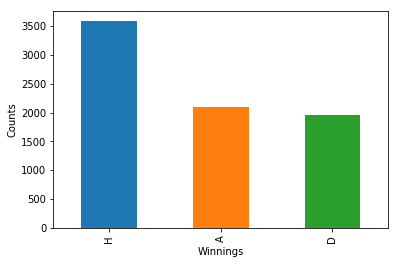

In [62]:
# Plotting a graph of the total counts for the Potential winnings.
degree_count = dataset['FTR'].value_counts() 
degree_count.plot(kind='bar')
plt.xlabel('Winnings')
plt.ylabel('Counts')
plt.show() 

In [39]:
# Getting the numbers of winnings for the HOME TEAM 
hometeam_count = dataset[dataset['FTR'] == 'H'].count() 
print(hometeam_count['FTR'], 'winnings for the HOME TEAM')

3587 winnings for the HOME TEAM


In [40]:
# Getting the number of winnings for the AWAY TEAM 
awayteam_count = dataset[dataset['FTR'] == 'A'].count() 
print(awayteam_count['FTR'], 'winnings for the AWAY TEAM')

2099 winnings for the AWAY TEAM


## EDA for HOME TEAM

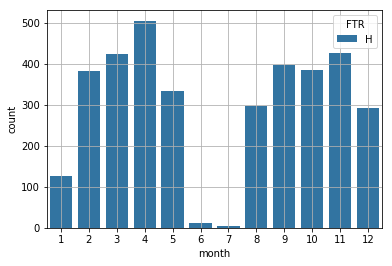

In [61]:
# f, axis = plt.subplots(1, 3)
# Plotting a count plot of graph of winnings for the HOME TEAM only
# Against the month inwhich they won the most.
hometeam_count = dataset[dataset['FTR'] == 'H']
sns.countplot(x='month', hue='FTR', data=hometeam_count)
plt.grid(True)
plt.show() 

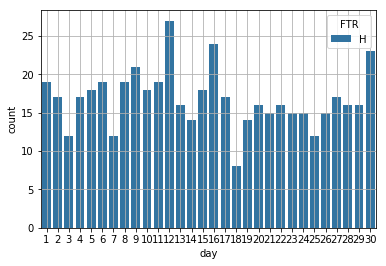

In [42]:
# Plotting a count plot of graph of winnings for the HOME TEAM only
# Against the month inwhich they won the most.
# the month being the 4th month and is filtered off before plotting. 
month_4th_count = hometeam_count[hometeam_count['month'] == 4]
ax = sns.countplot(x='day', hue='FTR', data=month_4th_count)
plt.grid(True)
plt.show() 

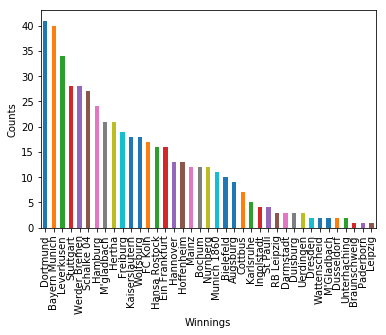

In [43]:
# showing a count plot of home team wining in the month of April (4th month)
# ax = sns.countplot(x='FTR', hue='HomeTeam', data=hometeam_count)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show() 
month_4th_win = month_4th_count['HomeTeam'].value_counts()
month_4th_win.plot(kind='bar')
plt.xlabel('Winnings')
plt.ylabel('Counts')
plt.show() 

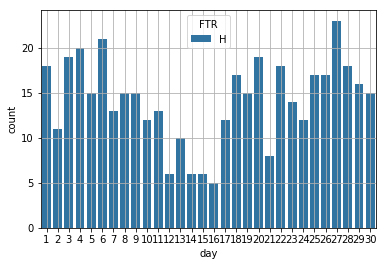

In [44]:
# showing the plot of the home team winings in the month of November and 
# the most respective dates that are more ranpant for the home team to win 
# in the month of November. 
hometeam_monthcount = hometeam_count[hometeam_count['month'] == 11]
ax = sns.countplot(x='day', hue='FTR', data=hometeam_monthcount)
plt.grid(True)
plt.show() 

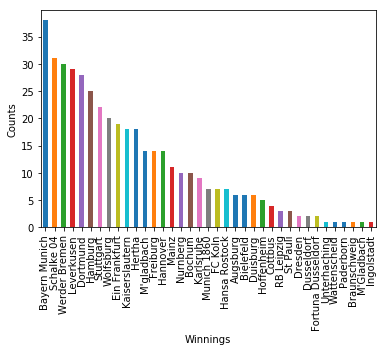

In [45]:
# winnings for the 11th month 
month11th_win = hometeam_monthcount['HomeTeam'].value_counts() 
month11th_win.plot(kind='bar')
plt.xlabel('Winnings')
plt.ylabel('Counts')
plt.show() 

## EDA for AWAY TEAM

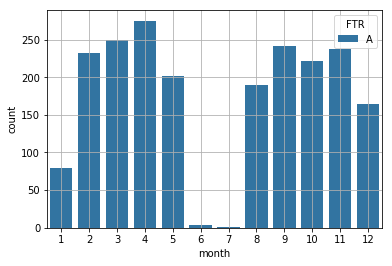

In [46]:
# Plotting a count plot of the fraph of winnings for the AWAY TEAM only 
# Against the month in which they won the most. 
awayteam_count = dataset[dataset['FTR'] == 'A']
ax = sns.countplot(x='month', hue='FTR', data=awayteam_count)
plt.grid(True)
plt.show() 

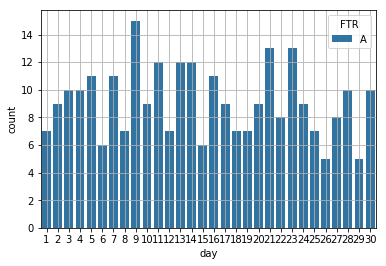

In [47]:
#
month_4th_count = awayteam_count[awayteam_count['month'] == 4]
ax = sns.countplot(x='day', hue='FTR', data=month_4th_count)
plt.grid(True)
plt.show() 

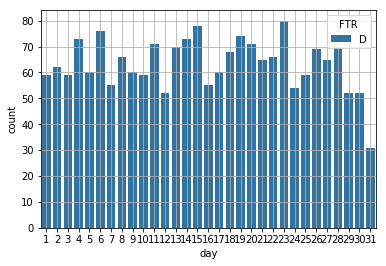

In [48]:
# Plotting a count plot of the graph of Draws for the team 
draw_count = dataset[dataset['FTR'] == 'D']
ax = sns.countplot(x='day', hue='FTR', data=draw_count)
plt.grid(True) 
plt.show() 

In [49]:
df.head() 

,S_year1,S_year2,year,month,day,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1993,94,1993,8,7,1.0,12.0,3,1,1
1,1993,94,1993,8,7,2.0,14.0,2,1,1
2,1993,94,1993,8,7,3.0,15.0,2,2,3
3,1993,94,1993,8,7,4.0,13.0,0,2,2
4,1993,94,1993,8,7,5.0,16.0,5,2,1


In [22]:
#### Building A Machine Learning Model To Fit The Data #### 
## 1). Logistic Regression

In [85]:
# Importing the necessary packages needed for Building the model 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve 

In [86]:
# saving the dataset into input(x) feature and output feature(y)
X = df.iloc[:, 0:7].values  
y = df.iloc[:, 9].values

In [87]:
# Splitting the dataset into train and test set split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size = 0.2, 
                                                   random_state = 50)

In [88]:
# Finding the Feature that is Soley Dependent on the Full Time Results
# using chi squared mean 

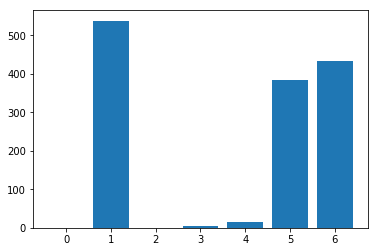

In [89]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest

# 
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show() 

In [90]:
## Using Mutual Information Feature Selection to Check the Column that is Solely 
# Dependent on the Full Time Results 

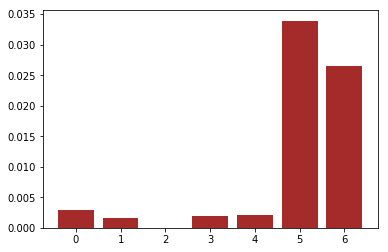

In [91]:
from sklearn.feature_selection import mutual_info_classif 
from sklearn.feature_selection import SelectKBest

# 
ms = SelectKBest(score_func=mutual_info_classif, k='all')
ms.fit(X_train, y_train)
plt.bar([i for i in range(len(ms.scores_))], ms.scores_, color='brown')
plt.show() 

In [92]:
# Displaying the shape of the Training data 
print(X_train.shape)
print(y_train.shape)

(6012, 7)
(6012,)


In [93]:
# Displaying the shape of the test data 
print(X_test.shape)
print(y_test.shape)

(1504, 7)
(1504,)


In [94]:
# Building The Model using Linear Regression 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
# Training the model 
model.score(X_test, y_test)

0.4714095744680851

In [96]:
# To predict, the inputs must be given 
# [S_year1, S_year2, year, month, day, HomeTeam, AwayTeam]
new_value = [
    2017, 18, 2018, 5, 
    12, 17.0, 11.0
]

# reshaping the new input data so that the model could predict it 
new_value = np.array(new_value).reshape(1, -1)

# predicting the value for full time results 
model.predict(new_value)

array([1])

In [100]:
# # generate a no skill prediction (majority class)
# ns_probs = [0 for _ in range(len(y_test))]

# # predict probabilities
# lr_probs = model.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()

In [167]:
df.tail(4)

,S_year1,S_year2,year,month,day,HomeTeam,AwayTeam,FTHG,FTAG,FTR
7646,2017,18,2018,5,12,15.0,32.0,3,2,1
7647,2017,18,2018,5,12,33.0,9.0,1,2,2
7648,2017,18,2018,5,12,17.0,11.0,1,0,1
7649,2017,18,2018,5,12,28.0,4.0,4,1,1


In [168]:
# Building our deep neural network model 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
from keras.optimizers import SGD

In [184]:
# building the model using keras
# create and fit the LSTM network
model = Sequential()
model.add(Dense(120, input_dim=X_train.shape[1],
                kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                activation='tanh')
)
model.add(Dense(50, input_dim=X_train.shape[1], kernel_initializer='glorot_uniform',
               bias_initializer='zeros', activation='tanh')
)
model.add(Dense(50, input_dim=50, kernel_initializer='glorot_uniform', 
                bias_initializer='zeros', activation='tanh')
)
model.add(Dense(50, input_dim=50, kernel_initializer='glorot_uniform', 
                 bias_initializer='zeros', activation='tanh')
)
model.add(Dense(1, input_dim=50, kernel_initializer='glorot_uniform', 
                bias_initializer='zeros', activation='sigmoid'))

sgd = SGD(
    lr=0.001, decay=1e-7, momentum=0.9
)

# model.add(Dense(30, input_dim=7, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# Compiling the model 
model.compile(optimizer=sgd,
              loss='mean_squared_error',
              metrics=['accuracy'])

In [185]:
# Training the model 
model.fit(X_train, y_train, batch_size=5, epochs=50, validation_data=(X_test, y_test))

Train on 6012 samples, validate on 1504 samples
Epoch 1/50
6012/6012 [==============================] - 1s 234us/step - loss: 1.3301 - accuracy: 0.4681 - val_loss: 1.2518 - val_accuracy: 0.4701
Epoch 2/50
6012/6012 [==============================] - 1s 231us/step - loss: 1.3164 - accuracy: 0.4689 - val_loss: 1.2509 - val_accuracy: 0.4701
Epoch 3/50
6012/6012 [==============================] - 1s 242us/step - loss: 1.3158 - accuracy: 0.4689 - val_loss: 1.2506 - val_accuracy: 0.4701
Epoch 4/50
6012/6012 [==============================] - 1s 227us/step - loss: 1.3156 - accuracy: 0.4689 - val_loss: 1.2505 - val_accuracy: 0.4701
Epoch 5/50
6012/6012 [==============================] - 1s 237us/step - loss: 1.3155 - accuracy: 0.4689 - val_loss: 1.2504 - val_accuracy: 0.4701
Epoch 6/50
6012/6012 [==============================] - 1s 237us/step - loss: 1.3154 - accuracy: 0.4689 - val_loss: 1.2503 - val_accuracy: 0.4701
Epoch 7/50
6012/6012 [==============================] - 2s 250us/step - loss

In [171]:
model.evaluate(X_test, y_test)[1] * 100 

1504/1504 [==============================] - 0s 14us/step


47.0079779624939

In [178]:
new_val = [1993, 94, 1993, 8, 7, 4, 13]
new_val = np.array(new_val).reshape(1, -1)
model.predict(new_val)

array([[0.999992]], dtype=float32)

In [158]:
df.head() 

,S_year1,S_year2,year,month,day,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1993,94,1993,8,7,1.0,12.0,3,1,1
1,1993,94,1993,8,7,2.0,14.0,2,1,1
2,1993,94,1993,8,7,3.0,15.0,2,2,3
3,1993,94,1993,8,7,4.0,13.0,0,2,2
4,1993,94,1993,8,7,5.0,16.0,5,2,1
